In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# import studio.plotly as py
import plotly.tools as tls
import seaborn as sns


In [4]:
global_temp_country1 = pd.read_csv('C:/Users/LENOVO/Downloads/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
global_temp_country = pd.read_csv('C:/Users/LENOVO/Downloads/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('C:/Users/LENOVO/Downloads/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

In [6]:
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [7]:
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [8]:
global_temp_country = global_temp_country.dropna()

print(global_temp_country1)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinT

In [9]:
global_temp = global_temp.dropna()

print(global_temp)

dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
5        1744-04-01               5.788                          3.624   
6        1744-05-01              10.644                          1.283   
7        1744-06-01              14.051                          1.347   
8        1744-07-01              16.082                          1.396   
...             ...                 ...                            ...   
8599206  2013-04-01               7.710                          0.182   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
5         Århus      Denmark

In [10]:
global_temp_country1 = global_temp_country1.dropna()

print(global_temp_country1)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinT

In [11]:
global_temp_country1.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [12]:
global_temp_country1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
dt                                           1992 non-null object
LandAverageTemperature                       1992 non-null float64
LandAverageTemperatureUncertainty            1992 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


In [13]:
years = np.unique(global_temp_country['dt'].apply(lambda x : x[:4]))
mean_temp=[]
mean_temp_world_uncertainity=[]

for year in years:
    mean_temp.append(global_temp_country[global_temp_country['dt'].apply(lambda x: x[:4]==year)]['AverageTemperature'].mean())
    mean_temp_world_uncertainity.append(global_temp_country[global_temp_country['dt'].apply(lambda x:x[:4]==year)]['AverageTemperatureUncertainty'].mean())

trace1 = go.Scatter(x=years,y=np.array(mean_temp_world_uncertainity)+np.array(mean_temp),name="Max. Possible ", line_color='blue')
trace0 = go.Scatter(x=years,y=mean_temp,name="AvgTemp", line_color='black')
trace2 = go.Scatter(x=years,y=np.array(mean_temp)-np.array(mean_temp_world_uncertainity),name="Min Possible",fill='tonexty', mode='lines',line_color='orange')

data = [trace0,trace1,trace2 ]

layout = go.Layout(xaxis = dict(title='Year'), yaxis=dict(title='Average Temperature '),title='Average Global Temperature',showlegend=True)

fig=go.Figure(data,layout)
py.iplot(fig)

In [15]:
global_temp = global_temp_country1[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

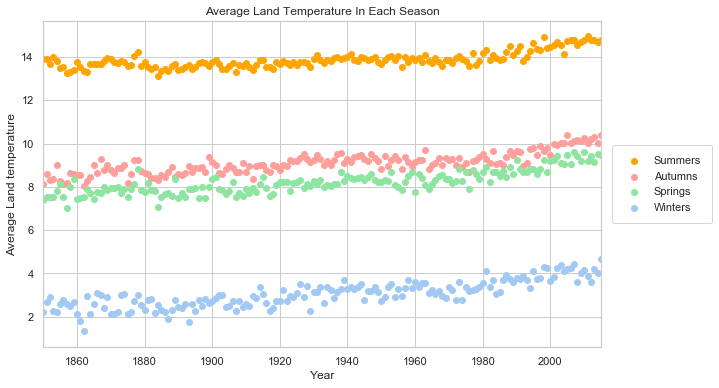

In [16]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.scatter(years, summer_temps, label='Summers', color='orange')
plt.scatter(years, autumn_temps, label='Autumns', color='r')
plt.scatter(years, spring_temps, label='Springs', color='g')
plt.scatter(years, winter_temps, label='Winters', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average Land temperature')
ax.set_xlabel('Year')
ax.set_title('Average Land Temperature In Each Season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)